In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/Shareddrives/SWC_Capstone/5월'

/content/drive/Shareddrives/SWC_Capstone/5월


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# VA Scoring Original Version

In [86]:
depression_origianlV = pd.read_csv("./scoring_result/depression_valence_score.csv")
print("depression_origianlV: ", len(depression_origianlV))

bipolar_origianlV = pd.read_csv("./scoring_result/bipolar_valence_score.csv")
print("bipolar_origianlV: ", len(bipolar_origianlV))

panic_origianlV = pd.read_csv("./scoring_result/panic_valence_score.csv")
print("panic_origianlV: ", len(panic_origianlV))

depression_origianlV:  760
bipolar_origianlV:  12737
panic_origianlV:  760


In [87]:
covid_origianlV = pd.read_csv("./scoring_result/covid19_valence_score.csv")
print("covid_origianlV: ", len(covid_origianlV))

# relationship_upgrade = pd.read_csv("./scoring_result/relationship_score.csv")
# print("relationship_upgrade: ", len(relationship_upgrade))

teaching_origianlV = pd.read_csv("./scoring_result/teaching_valence_score.csv")
print("teaching_origianlV: ", len(teaching_origianlV))

covid_origianlV:  868
teaching_origianlV:  10026


In [88]:
print("DEPRESSION")
print("V : ",sum(depression_origianlV['avgLexVal'])/len(depression_origianlV['avgLexVal']))
# print("A : ",sum(depression_origianlV['avgLexAro'])/len(depression_origianlV['avgLexAro']))

print("BIPOLAR")
print("V : ",sum(bipolar_origianlV['avgLexVal'])/len(bipolar_origianlV['avgLexVal']))
# print("A : ",sum(bipolar_origianlV['avgLexAro'])/len(bipolar_origianlV['avgLexAro']))

print("PANIC")
print("V : ",sum(panic_origianlV['avgLexVal'])/len(panic_origianlV['avgLexVal']))
# print("A : ",sum(bipolar_origianlV['avgLexAro'])/len(bipolar_origianlV['avgLexAro']))

DEPRESSION
V :  0.6198819035157977
BIPOLAR
V :  0.6316723286258095
PANIC
V :  0.6198819035157977


In [89]:
print("COVID19")
print("V : ",sum(covid_origianlV['avgLexVal'])/len(covid_origianlV['avgLexVal']))
# print("A : ",sum(covid_origianlV['avgLexAro'])/len(covid_origianlV['avgLexAro']))

print("TEACHING")
print("V : ",sum(teaching_origianlV['avgLexVal'])/len(teaching_origianlV['avgLexVal']))
# print("A : ",sum(teaching_origianlV['avgLexAro'])/len(teaching_origianlV['avgLexAro']))

COVID19
V :  0.6309561126935131
TEACHING
V :  0.6651442413657755


In [90]:
covid_ratio_V = covid_origianlV['numLexTokens']/ covid_origianlV['numTokens'] * covid_origianlV['avgLexVal']
# relationship_ratio_V = relationship_upgrade['numLexTokens']/ relationship_upgrade['numTokens'] * relationship_upgrade['avgLexVal']
teaching_ratio_V = teaching_origianlV['numLexTokens']/ teaching_origianlV['numTokens'] * teaching_origianlV['avgLexVal']

depression_ratio_V = depression_origianlV['numLexTokens']/ depression_origianlV['numTokens'] * depression_origianlV['avgLexVal']
bipolar_ratio_V = bipolar_origianlV['numLexTokens']/ bipolar_origianlV['numTokens'] * bipolar_origianlV['avgLexVal']
panic_ratio_V = panic_origianlV['numLexTokens']/ panic_origianlV['numTokens'] * panic_origianlV['avgLexVal']



## plot


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


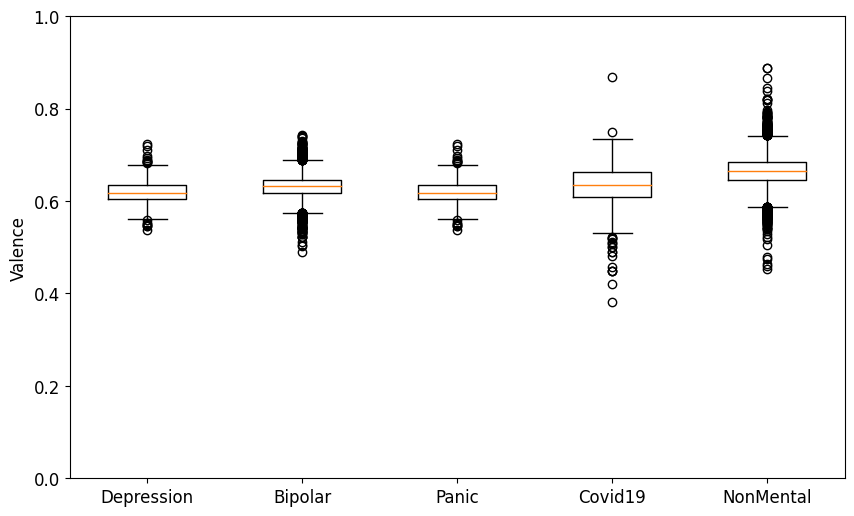

In [82]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = depression_origianlV['avgLexVal']
data_b = bipolar_origianlV['avgLexVal']
data_c = panic_origianlV['avgLexVal']
data_d = covid_origianlV['avgLexVal']
data_e = teaching_origianlV['avgLexVal']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-0., 1.)
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'])
ax.set_ylabel('Valence')


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

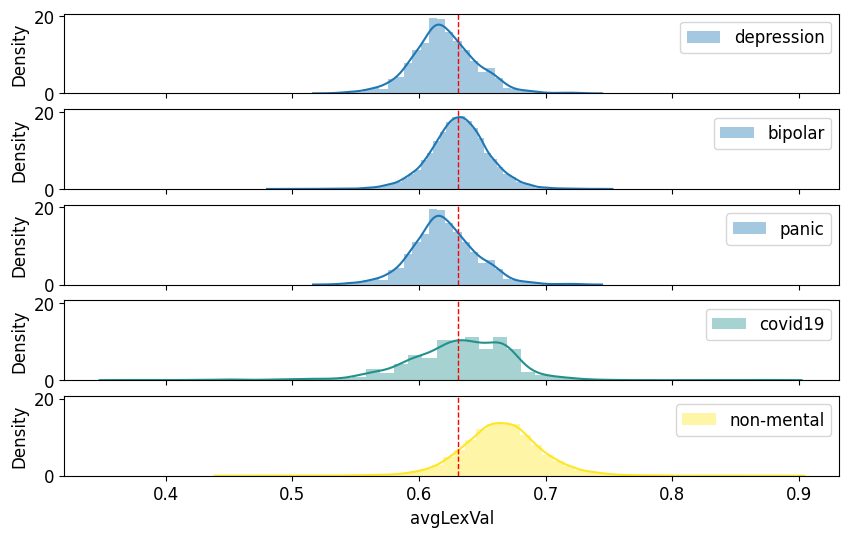

In [84]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_origianlV['avgLexVal'], ax=ax[0],label='depression')
sns.distplot(bipolar_origianlV['avgLexVal'], ax=ax[1],label='bipolar')
sns.distplot(panic_origianlV['avgLexVal'], ax=ax[2],label='panic')
sns.distplot(covid_origianlV['avgLexVal'], ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_origianlV['avgLexVal'], ax=ax[4],color = c_lst[4],label='non-mental')

for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  ax[i].axvline(x= covid_origianlV['avgLexVal'].mean(), color='r', linestyle='--', linewidth=1)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

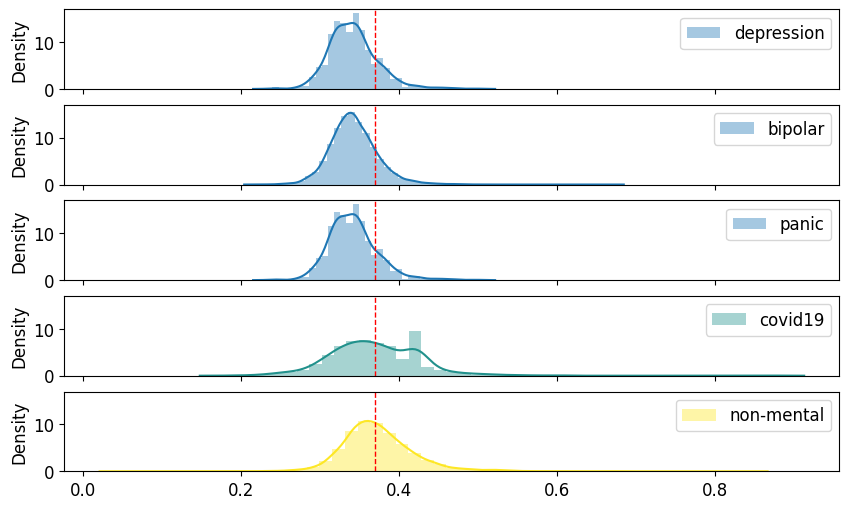

In [93]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_ratio_V, ax=ax[0],label='depression')
sns.distplot(bipolar_ratio_V, ax=ax[1],label='bipolar')
sns.distplot(panic_ratio_V, ax=ax[2],label='panic')
sns.distplot(covid_ratio_V, ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_ratio_V, ax=ax[4],color = c_lst[4],label='non-mental')

for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  # ax[i].set_ylim([0,7])
  ax[i].axvline(x= covid_ratio_V.mean(), color='r', linestyle='--', linewidth=1)

  

# VA Scoring Upgrade Version

In [ ]:
depression_upgrade = pd.read_csv("./scoring_result/upgraded_twice/depression_score.csv")
print("depression_upgrade: ", len(depression_upgrade))

bipolar_upgrade = pd.read_csv("./scoring_result/upgraded_twice/bipolar_score.csv")
print("bipolar_upgrade: ", len(bipolar_upgrade))

panic_upgrade = pd.read_csv("./scoring_result/upgraded_twice/panic_score.csv")
print("panic_upgrade: ", len(panic_upgrade))

depression_upgrade:  31226
bipolar_upgrade:  12737
panic_upgrade:  760


In [ ]:
covid_upgrade = pd.read_csv("./scoring_result/upgraded_twice/covid_score.csv")
print("covid_upgrade: ", len(covid_upgrade))

# relationship_upgrade = pd.read_csv("./scoring_result/upgraded_twice/relationship_score.csv")
# print("relationship_upgrade: ", len(relationship_upgrade))

teaching_upgrade = pd.read_csv("./scoring_result/upgraded_twice/teaching_score.csv")
print("teaching_upgrade: ", len(teaching_upgrade))

covid_upgrade:  868
teaching_upgrade:  10026


In [ ]:
print("DEPRESION")
print("V : ",sum(depression_upgrade['avgLexVal'])/len(depression_upgrade['avgLexVal']))
print("A : ",sum(depression_upgrade['avgLexAro'])/len(depression_upgrade['avgLexAro']))

print("BIPOLAR")
print("V : ",sum(bipolar_upgrade['avgLexVal'])/len(bipolar_upgrade['avgLexVal']))
print("A : ",sum(bipolar_upgrade['avgLexAro'])/len(bipolar_upgrade['avgLexAro']))

print("PANIC")
print("V : ",sum(panic_upgrade['avgLexVal'])/len(panic_upgrade['avgLexVal']))
print("A : ",sum(panic_upgrade['avgLexAro'])/len(panic_upgrade['avgLexAro']))

print("COVID19")
print("V : ",sum(covid_upgrade['avgLexVal'])/len(covid_upgrade['avgLexVal']))
print("A : ",sum(covid_upgrade['avgLexAro'])/len(covid_upgrade['avgLexAro']))

# print("RELATIONSHIP")
# print("V : ",sum(relationship_upgrade['avgLexVal'])/len(relationship_upgrade['avgLexVal']))
# print("A : ",sum(relationship_upgrade['avgLexAro'])/len(relationship_upgrade['avgLexAro']))

print("TEACHING")
print("V : ",sum(teaching_upgrade['avgLexVal'])/len(teaching_upgrade['avgLexVal']))
print("A : ",sum(teaching_upgrade['avgLexAro'])/len(teaching_upgrade['avgLexAro']))

DEPRESION
V :  0.16535587769959792
A :  0.19533000127289152
BIPOLAR
V :  0.14502342730132545
A :  0.17115225996688652
PANIC
V :  -0.027016957455409284
A :  0.006284273913863853
COVID19
V :  0.2316580971670437
A :  0.2257008340583427
TEACHING
V :  0.5685363954772406
A :  0.5814640913992989


In [ ]:
covid_ratio_V = covid_upgrade['numLexTokens']/ covid_upgrade['numTokens'] * covid_upgrade['avgLexVal']
# relationship_ratio_V = relationship_upgrade['numLexTokens']/ relationship_upgrade['numTokens'] * relationship_upgrade['avgLexVal']
teaching_ratio_V = teaching_upgrade['numLexTokens']/ teaching_upgrade['numTokens'] * teaching_upgrade['avgLexVal']

covid_ratio_A = covid_upgrade['numLexTokens']/ covid_upgrade['numTokens'] * covid_upgrade['avgLexAro']
# relationship_ratio_A = relationship_upgrade['numLexTokens']/ relationship_upgrade['numTokens'] * relationship_upgrade['avgLexAro']
teaching_ratio_A = teaching_upgrade['numLexTokens']/ teaching_upgrade['numTokens'] * teaching_upgrade['avgLexAro']


depression_ratio_V = depression_upgrade['numLexTokens']/ depression_upgrade['numTokens'] * depression_upgrade['avgLexVal']
bipolar_ratio_V = bipolar_upgrade['numLexTokens']/ bipolar_upgrade['numTokens'] * bipolar_upgrade['avgLexVal']
panic_ratio_V = panic_upgrade['numLexTokens']/ panic_upgrade['numTokens'] * panic_upgrade['avgLexVal']

depression_ratio_A = depression_upgrade['numLexTokens']/ depression_upgrade['numTokens'] * depression_upgrade['avgLexAro']
bipolar_ratio_A = bipolar_upgrade['numLexTokens']/ bipolar_upgrade['numTokens'] * bipolar_upgrade['avgLexAro']
panic_ratio_A = panic_upgrade['numLexTokens']/ panic_upgrade['numTokens'] * panic_upgrade['avgLexAro']

In [ ]:
def normalize_df(df):
    for i in range(len(df)):
        if df['avgLexVal'][i] > 1:
            df['avgLexVal'][i] = 1
        elif df['avgLexVal'][i] < -1:
            df['avgLexVal'][i] = -1

    for i in range(len(df)):
        if df['avgLexAro'][i] > 1:
            df['avgLexAro'][i] = 1
        elif df['avgLexAro'][i] < -1:
            df['avgLexAro'][i] = -1

normalize_df(covid_upgrade)
# normalize_df(relationship_upgrade)
normalize_df(teaching_upgrade)

normalize_df(depression_upgrade)
normalize_df(bipolar_upgrade)
normalize_df(panic_upgrade)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/py

In [ ]:
def normalize_lst(val, aro):
    for i in range(len(val)):
        if val[i] > 1:
            val[i] = 1
        elif val[i] < -1:
            val[i] = -1
    
    for i in range(len(aro)):
        if aro[i] > 1:
            aro[i] = 1
        elif aro[i] < -1:
            aro[i] = -1
    


normalize_lst(covid_ratio_V, covid_ratio_A)
# normalize_lst(relationship_ratio_V, relationship_ratio_A)
normalize_lst(teaching_ratio_V, teaching_ratio_A)


normalize_lst(depression_ratio_V, depression_ratio_A)
normalize_lst(bipolar_ratio_V, bipolar_ratio_A)
normalize_lst(panic_ratio_V, panic_ratio_A)

In [ ]:
def normalize_lst(val, aro):
    for i in range(len(val)):
        if val[i] > 1:
            val[i] = 1
        elif val[i] < -1:
            val[i] = -1
    
    for i in range(len(aro)):
        if aro[i] > 1:
            aro[i] = 1
        elif aro[i] < -1:
            aro[i] = -1

normalize_lst(covid_ratio_V, covid_ratio_A)
# normalize_lst(relationship_ratio_V, relationship_ratio_A)
normalize_lst(teaching_ratio_V, teaching_ratio_A)


normalize_lst(depression_ratio_V, depression_ratio_A)
normalize_lst(bipolar_ratio_V, bipolar_ratio_A)
normalize_lst(panic_ratio_V, panic_ratio_A)


In [ ]:
print("DEPRESION")
print("V : ",sum(depression_ratio_V)/len(depression_ratio_V))
print("A : ",sum(depression_ratio_A)/len(depression_ratio_A))

print("BIPOLAR")
print("V : ",bipolar_ratio_V.sum()/len(bipolar_ratio_V))
print("A : ",bipolar_ratio_A.sum()/len(bipolar_ratio_A))

print("PANIC")
print("V : ",sum(panic_ratio_V)/len(panic_ratio_V))
print("A : ",sum(panic_ratio_A)/len(panic_ratio_A))


print("COVID19")
print("V : ",sum(covid_ratio_V)/len(covid_ratio_V))
print("A : ",sum(covid_ratio_A)/len(covid_ratio_A))

# print("RELATIONSHIP")
# print("V : ",relationship_ratio_V.sum()/len(relationship_ratio_V))
# print("A : ",relationship_ratio_A.sum()/len(relationship_ratio_A))

print("TEACHING")
print("V : ",sum(teaching_ratio_V)/len(teaching_ratio_V))
print("A : ",sum(teaching_ratio_A)/len(teaching_ratio_A))

DEPRESION
V :  0.053765969975960046
A :  0.06356616889188035
BIPOLAR
V :  0.04856249558371188
A :  0.05742498366482749
PANIC
V :  -0.010168320502036862
A :  0.001314124216455266
COVID19
V :  0.09460747705341686
A :  0.0909083667307137
TEACHING
V :  0.216231169825949
A :  0.22105441354924052


## Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


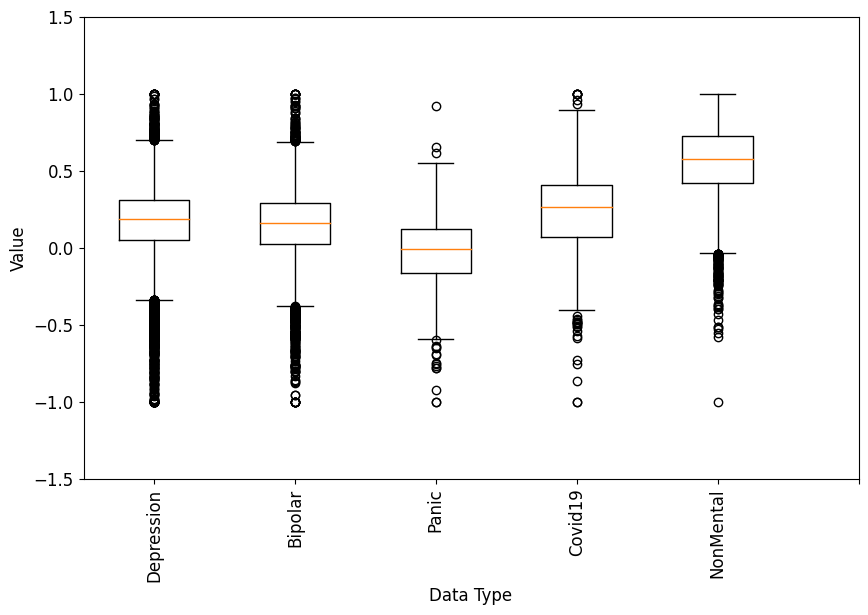

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_upgrade['avgLexVal']
data_b = bipolar_upgrade['avgLexVal']
data_c = panic_upgrade['avgLexVal']
data_d = covid_upgrade['avgLexVal']
# data_b = relationship_upgrade['avgLexVal']
data_e = teaching_upgrade['avgLexVal']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'],rotation= 90)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')


plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


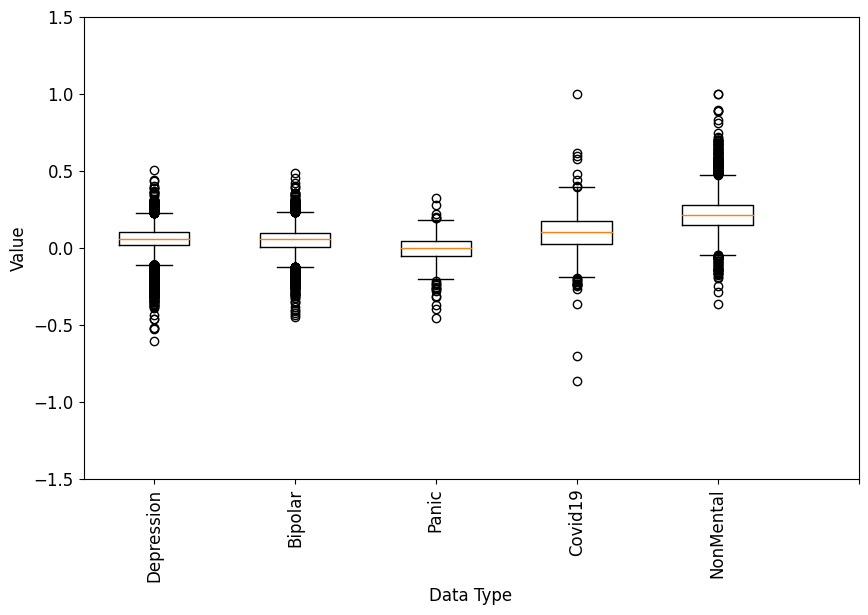

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_ratio_V
data_b =bipolar_ratio_V
data_c = panic_ratio_V
data_d = covid_ratio_V
# data_b = relationship_upgrade['avgLexVal']
data_e = teaching_ratio_V

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'],rotation= 90)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')


plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


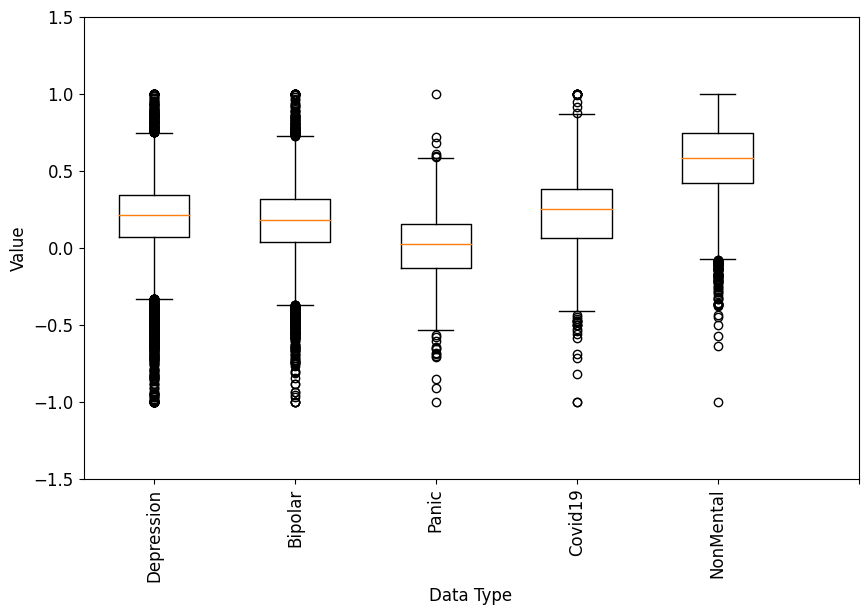

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_upgrade['avgLexAro']
data_b = bipolar_upgrade['avgLexAro']
data_c = panic_upgrade['avgLexAro']
data_d = covid_upgrade['avgLexAro']
# data_b = relationship_upgrade['avgLexVal']
data_e = teaching_upgrade['avgLexAro']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'],rotation= 90)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')


plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


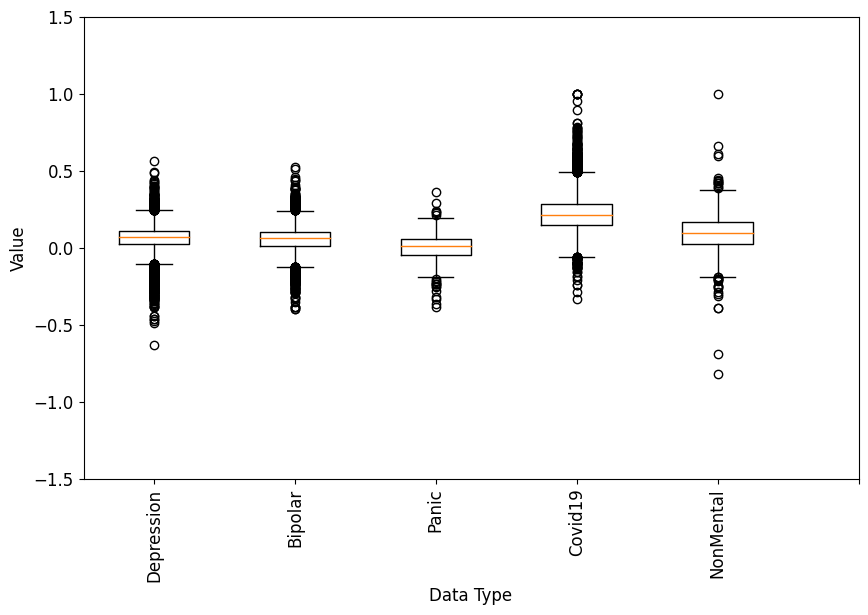

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_ratio_A
data_b =bipolar_ratio_A
data_c = panic_ratio_A
data_d = teaching_ratio_A
# data_b = relationship_upgrade['avgLexVal']
data_e = covid_ratio_A

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-1.5, 1.5)
ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'],rotation= 90)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

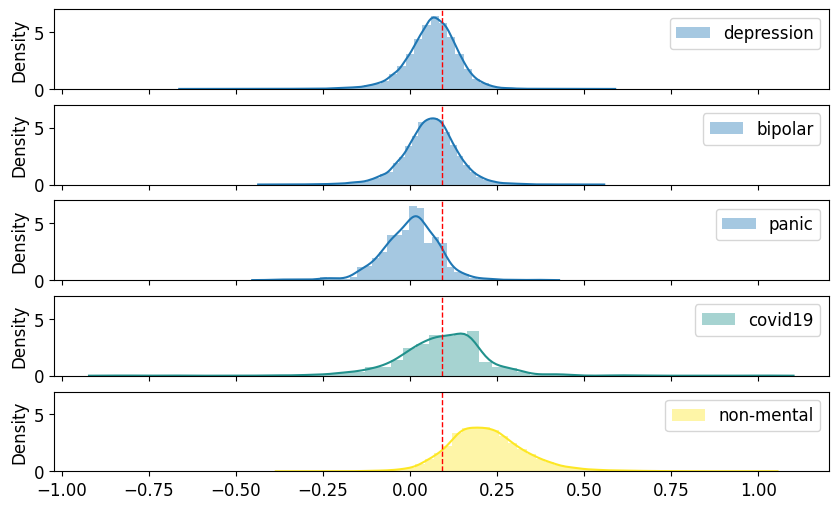

In [ ]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_ratio_A, ax=ax[0],label='depression')
sns.distplot(bipolar_ratio_A, ax=ax[1],label='bipolar')
sns.distplot(panic_ratio_A, ax=ax[2],label='panic')
sns.distplot(covid_ratio_A, ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_ratio_A, ax=ax[4],color = c_lst[4],label='non-mental')

for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  ax[i].set_ylim([0,7])
  ax[i].axvline(x= covid_ratio_A.mean(), color='r', linestyle='--', linewidth=1)

  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

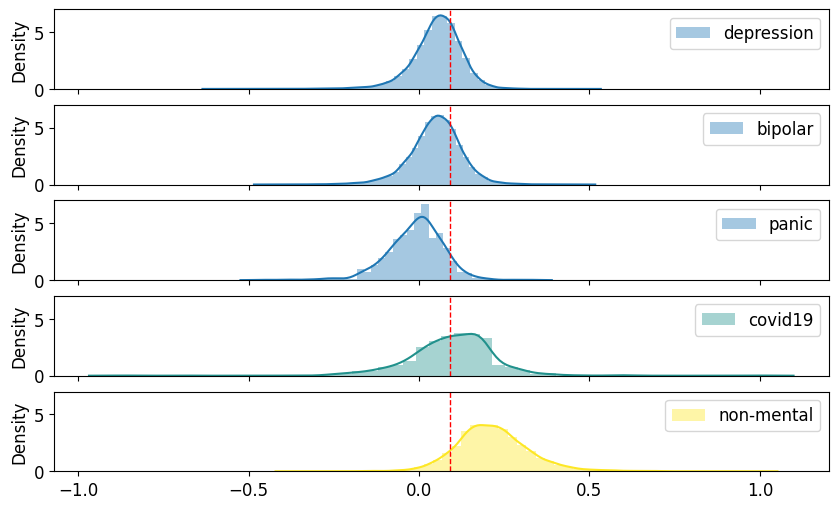

In [ ]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_ratio_V, ax=ax[0],label='depression')
sns.distplot(bipolar_ratio_V, ax=ax[1],label='bipolar')
sns.distplot(panic_ratio_V, ax=ax[2],label='panic')
sns.distplot(covid_ratio_V, ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_ratio_V, ax=ax[4],color = c_lst[4],label='non-mental')

for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  ax[i].set_ylim([0,7])
  ax[i].axvline(x= covid_ratio_A.mean(), color='r', linestyle='--', linewidth=1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

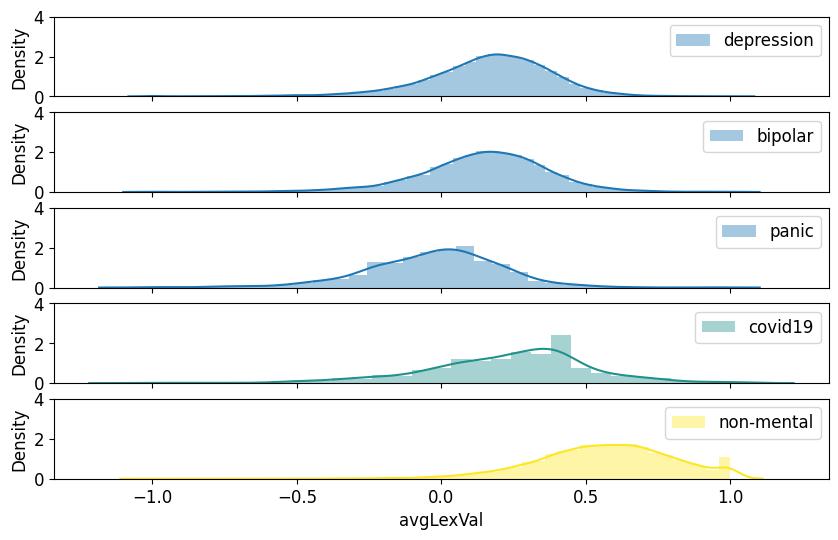

In [ ]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_upgrade['avgLexVal'], ax=ax[0],label='depression')
sns.distplot(bipolar_upgrade['avgLexVal'], ax=ax[1],label='bipolar')
sns.distplot(panic_upgrade['avgLexVal'], ax=ax[2],label='panic')
sns.distplot(covid_upgrade['avgLexVal'], ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_upgrade['avgLexVal'], ax=ax[4],color = c_lst[4],label='non-mental')

for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  ax[i].set_ylim([0,4])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

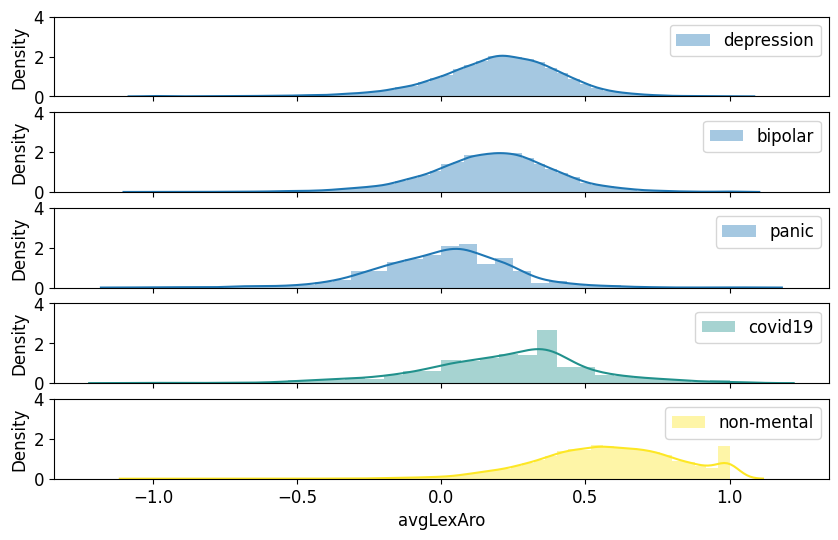

In [ ]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_upgrade['avgLexAro'], ax=ax[0],label='depression')
sns.distplot(bipolar_upgrade['avgLexAro'], ax=ax[1],label='bipolar')
sns.distplot(panic_upgrade['avgLexAro'], ax=ax[2],label='panic')
sns.distplot(covid_upgrade['avgLexAro'], ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_upgrade['avgLexAro'], ax=ax[4],color = c_lst[4],label='non-mental')

for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  ax[i].set_ylim([0,4])
  # ax[i].ayhline(y= data_d.mean(), color='r', linestyle='--', linewidth=1)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

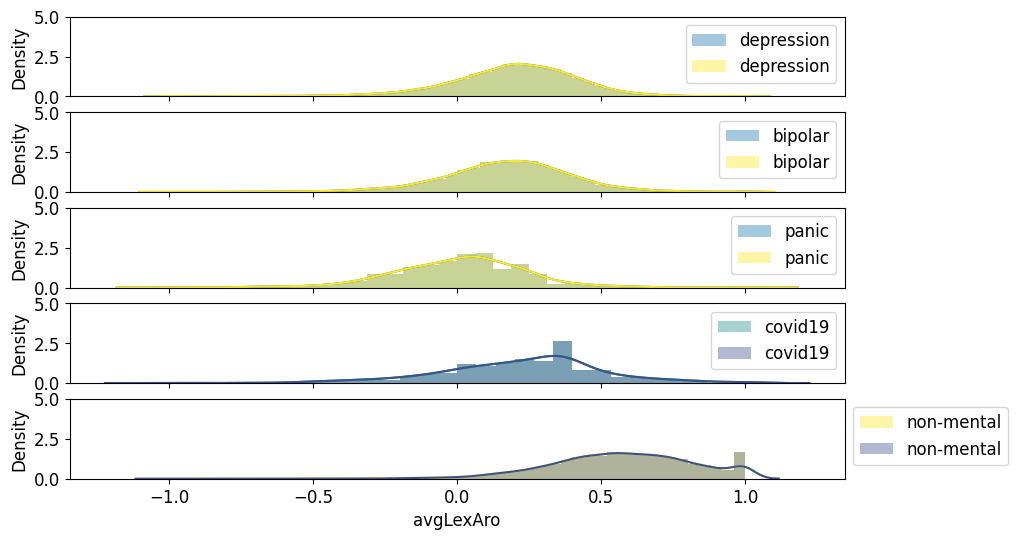

In [ ]:
c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]

fig, ax = plt.subplots(nrows=5,sharex=True, sharey=True)

sns.distplot(depression_upgrade['avgLexAro'], ax=ax[0],label='depression')
sns.distplot(bipolar_upgrade['avgLexAro'], ax=ax[1],label='bipolar')
sns.distplot(panic_upgrade['avgLexAro'], ax=ax[2],label='panic')
sns.distplot(covid_upgrade['avgLexAro'], ax=ax[3],color = c_lst[2],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_upgrade['avgLexAro'], ax=ax[4],color = c_lst[4],label='non-mental')

sns.distplot(depression_upgrade['avgLexAro'], color = c_lst[4],ax=ax[0],label='depression')
sns.distplot(bipolar_upgrade['avgLexAro'], ax=ax[1],color = c_lst[4],label='bipolar')
sns.distplot(panic_upgrade['avgLexAro'], ax=ax[2],color = c_lst[4],label='panic')
sns.distplot(covid_upgrade['avgLexAro'], ax=ax[3],color = c_lst[1],label='covid19')
# sns.distplot(relationship_upgrade['avgLexVal'], ax=ax[1],label='depression')
sns.distplot(teaching_upgrade['avgLexAro'], ax=ax[4],color = c_lst[1],label='non-mental')


for i in range(5):
  ax[i].legend(bbox_to_anchor=(1.0, 1.0))
  ax[i].set_ylim([0,5])


# Category Intensity Algorithm

In [ ]:
depression_catScore = pd.read_csv('./scoring_result/category/depression_catScore.csv',sep=',')
bipolar_catScore = pd.read_csv('./scoring_result/category/bipolar_catScore.csv',sep=',')
panic_catScore = pd.read_csv('./scoring_result/category/panic_catScore.csv',sep=',')

covid_catScore = pd.read_csv('./scoring_result/category/covid_catScore.csv',sep=',')
teaching_catScore = pd.read_csv('./scoring_result/category/teaching_catScore.csv',sep=',')
#relationship_catScore = pd.read_csv('./scoring_result/category/relationship_catScore.csv',sep=',')


In [4]:
def get_catRatio_Score(df):
    columns_lst = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
    new_df = df.copy()
    for i in range(len(df)):
        original = df.iloc[i][3:]
        sum_val = np.sum(original)
        if sum_val == 0:
            ratio = original
        else:
            ratio = original / sum_val

        #print(ratio[:])

        for j in range(8):
            new_df.loc[i, columns_lst[j]] = ratio[j]
        #new_df.loc[i][3:] = ratio
    print(new_df) 
    return new_df


In [ ]:
depression_catRScore = get_catRatio_Score(depression_catScore)
bipolar_catRScore = get_catRatio_Score(bipolar_catScore)
panic_catRScore = get_catRatio_Score(panic_catScore)

covid_catRScore = get_catRatio_Score(covid_catScore)
teaching_catRScore = get_catRatio_Score(teaching_catScore)

                      date  year  month     anger  anticipation   disgust  \
0      2022-02-28 22:35:23  2022      2  0.124934      0.135989  0.065384   
1      2022-02-28 21:41:47  2022      2  0.103681      0.184392  0.088297   
2      2022-02-28 21:27:32  2022      2  0.118725      0.089078  0.108389   
3      2022-02-28 21:26:27  2022      2  0.130811      0.049935  0.109684   
4      2022-02-28 20:44:19  2022      2  0.069703      0.089030  0.099752   
...                    ...   ...    ...       ...           ...       ...   
31221  2018-03-01 18:10:23  2018      3  0.111655      0.000000  0.129339   
31222  2018-03-01 14:37:07  2018      3  0.098803      0.087446  0.110593   
31223  2018-03-01 08:47:49  2018      3  0.089198      0.147152  0.114359   
31224  2018-03-01 07:54:47  2018      3  0.143248      0.058502  0.154553   
31225  2018-03-01 00:20:39  2018      3  0.092754      0.099380  0.100352   

           fear       joy   sadness  surprise     trust  
0      0.167062  

In [6]:
def cat_hist(df):
    fig= plt.figure(figsize=(10,5))

    sns.kdeplot(df['anger'],label = 'anger')
    sns.kdeplot(df['anticipation'],label = 'anticipation')
    sns.kdeplot(df['disgust'],label = 'disgust')
    sns.kdeplot(df['fear'],label = 'fear')
    sns.kdeplot(df['joy'],label = 'joy')
    sns.kdeplot(df['sadness'],label = 'sadness')
    sns.kdeplot(df['surprise'],label = 'surprise')
    sns.kdeplot(df['trust'],label = 'trust')

    plt.legend(['anger','anticipation','disgust','fear','joy','sadness','surprise','trust'])


def cat_box(df):
    data_a = df['anger']
    data_b =df['anticipation']
    data_c = df['disgust']
    data_d = df['fear']
    data_e = df['joy']
    data_f = df['sadness']
    data_g = df['surprise']
    data_h = df['trust']

    # 3. 그래프 그리기
    fig, ax = plt.subplots()
    violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e,data_f,data_g,data_h])#,showmedians=True)
    ax.set_ylim(-.1, 1.1)
    ax.set_xticks(np.arange(1, 9))
    ax.set_xticklabels(['anger','anticipation','disgust','fear','joy','sadness','surprise','trust'],rotation= 90)
    ax.set_xlabel('Data Type')
    ax.set_ylabel('Value')

def cat_hist_by_all_red(df1,df2,df3,df4,df5):
    fig, ax = plt.subplots(nrows=8,figsize=(10,20),sharex=True, sharey=True)
    c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]
    cat = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
    for i in range(8):
        sns.kdeplot(df1[cat[i]], color = c_lst[0], ax=ax[i])
        sns.kdeplot(df2[cat[i]], color = c_lst[1], ax=ax[i])
        sns.kdeplot(df3[cat[i]], color = c_lst[2], ax=ax[i])
        sns.kdeplot(df4[cat[i]], color = 'r', ax=ax[i])
        sns.kdeplot(df5[cat[i]], color = c_lst[3], ax=ax[i])
        ax[i].legend(['depression','bipolar','panic','covid19','non-mental'])
        ax[i].set_title(cat[i])
        ax[i].set(xlim=(-0.1, 1)) 
    # names = ['depression','bipolar','panic','covid19','teaching']


def cat_box_by_all_red(df1,df2,df3,df4,df5):
    fig, ax = plt.subplots(nrows=8,figsize=(12,40),sharex=True, sharey=True)
    c_lst = [plt.cm.viridis(a) for a in np.linspace(0.0, 1.0, 5)]
    cat = ['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
    for i in range(8):
        data_a = df1[cat[i]]
        data_b = df2[cat[i]]
        data_c = df3[cat[i]]
        data_d = df4[cat[i]]
        data_e = df5[cat[i]]
        ax[i].boxplot([data_a, data_b,data_c,data_d,data_e])
        ax[i].set_ylim(-.1, 1.1)
        ax[i].set_xticks(np.arange(1, 6))
        ax[i].set_xticklabels(['depression','bipolar','panic','covid19','non-mental'])
        ax[i].set_title(cat[i])
        ax[i].axhline(y= data_d.mean(), color='r', linestyle='--', linewidth=1)
    # names = ['depression','bipolar','panic','covid19','teaching']



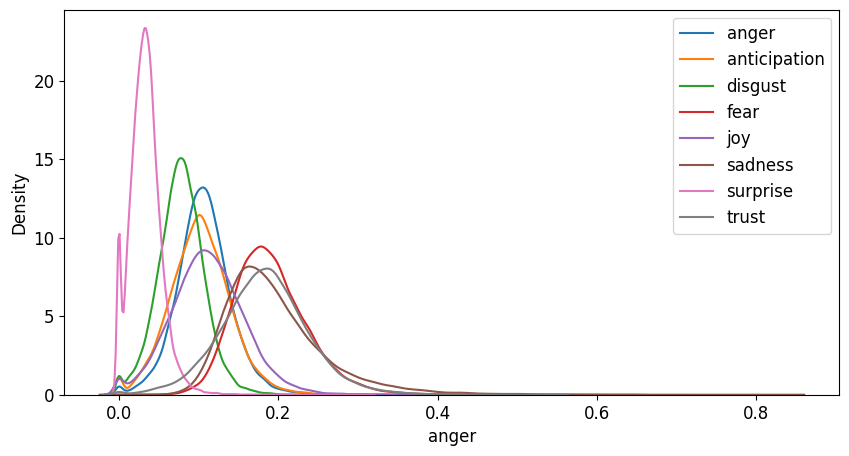

In [ ]:
cat_hist(depression_catRScore)

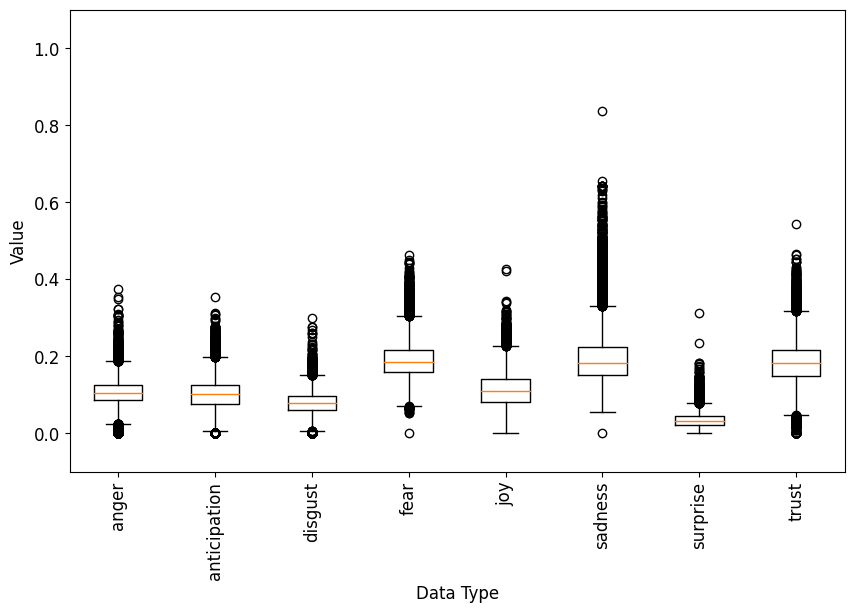

In [ ]:
cat_box(depression_catRScore)

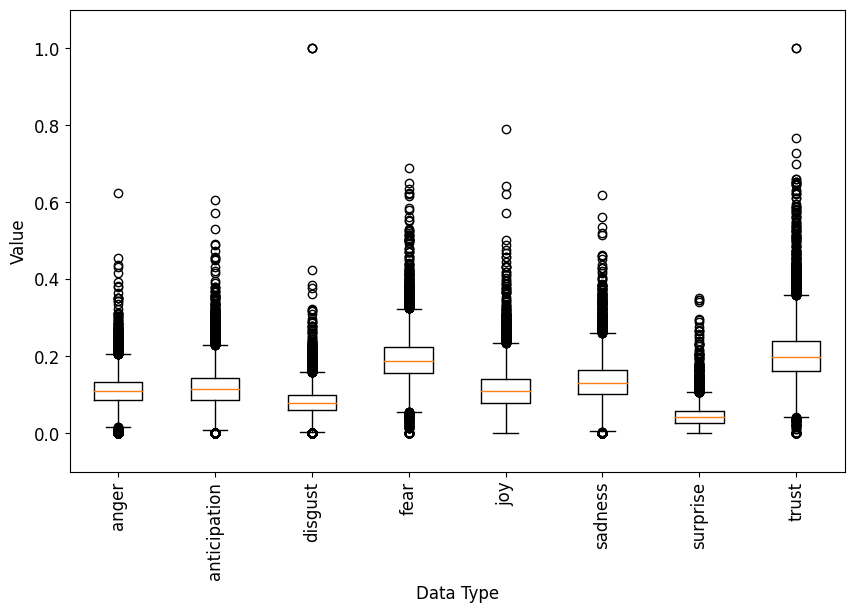

In [ ]:
cat_box(bipolar_catRScore)

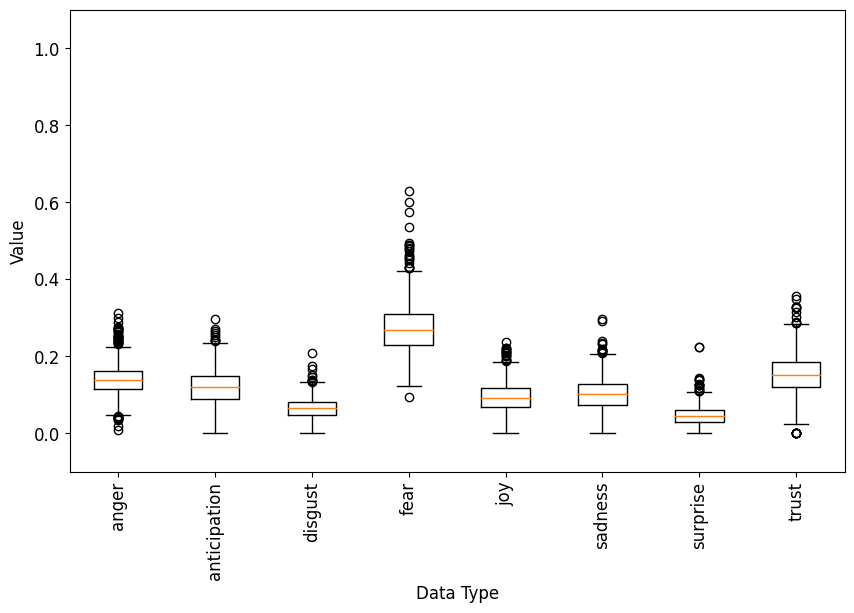

In [ ]:
cat_box(panic_catRScore)

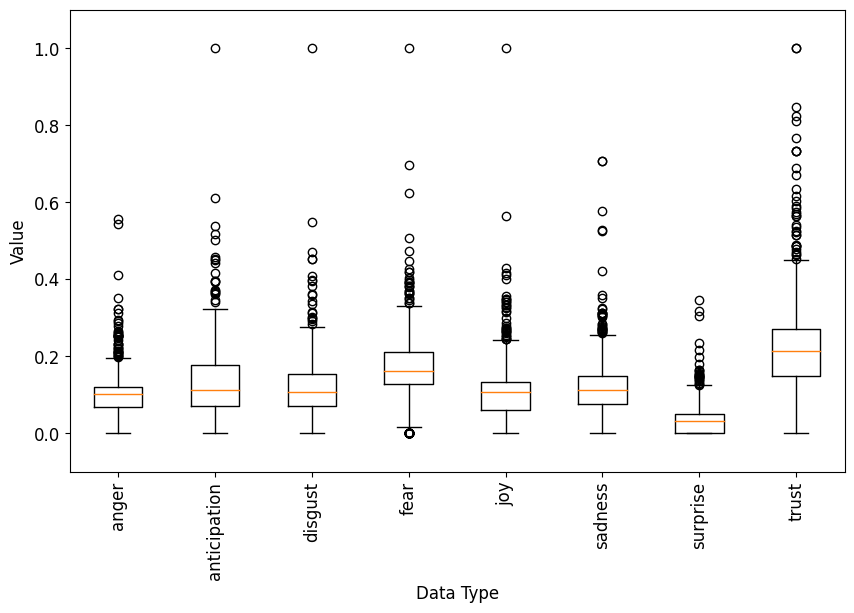

In [ ]:
cat_box(covid_catRScore)

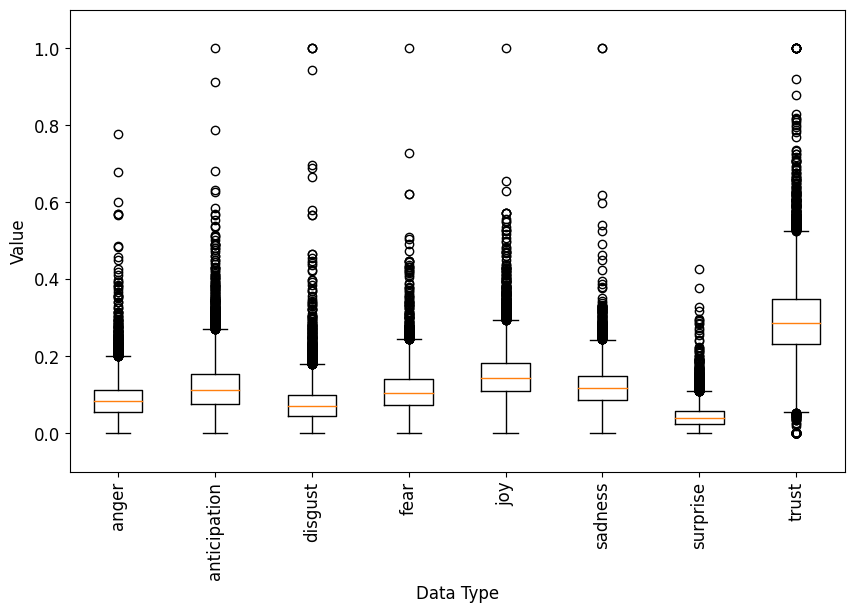

In [ ]:
cat_box(teaching_catRScore)

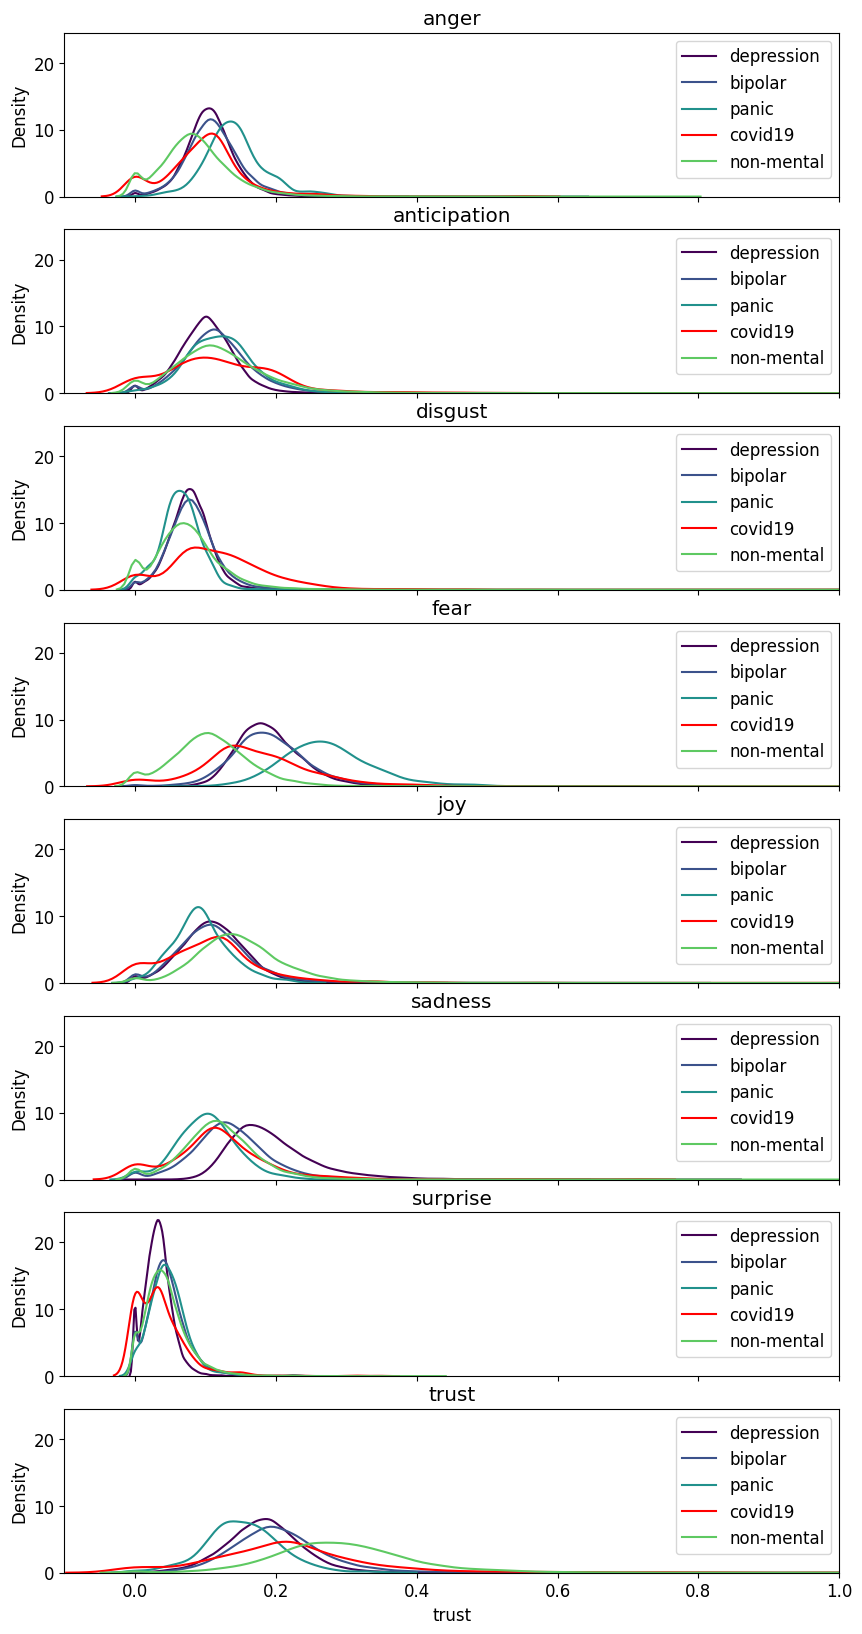

In [ ]:
cat_hist_by_all_red(depression_catRScore,bipolar_catRScore,panic_catRScore,covid_catRScore,teaching_catRScore)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

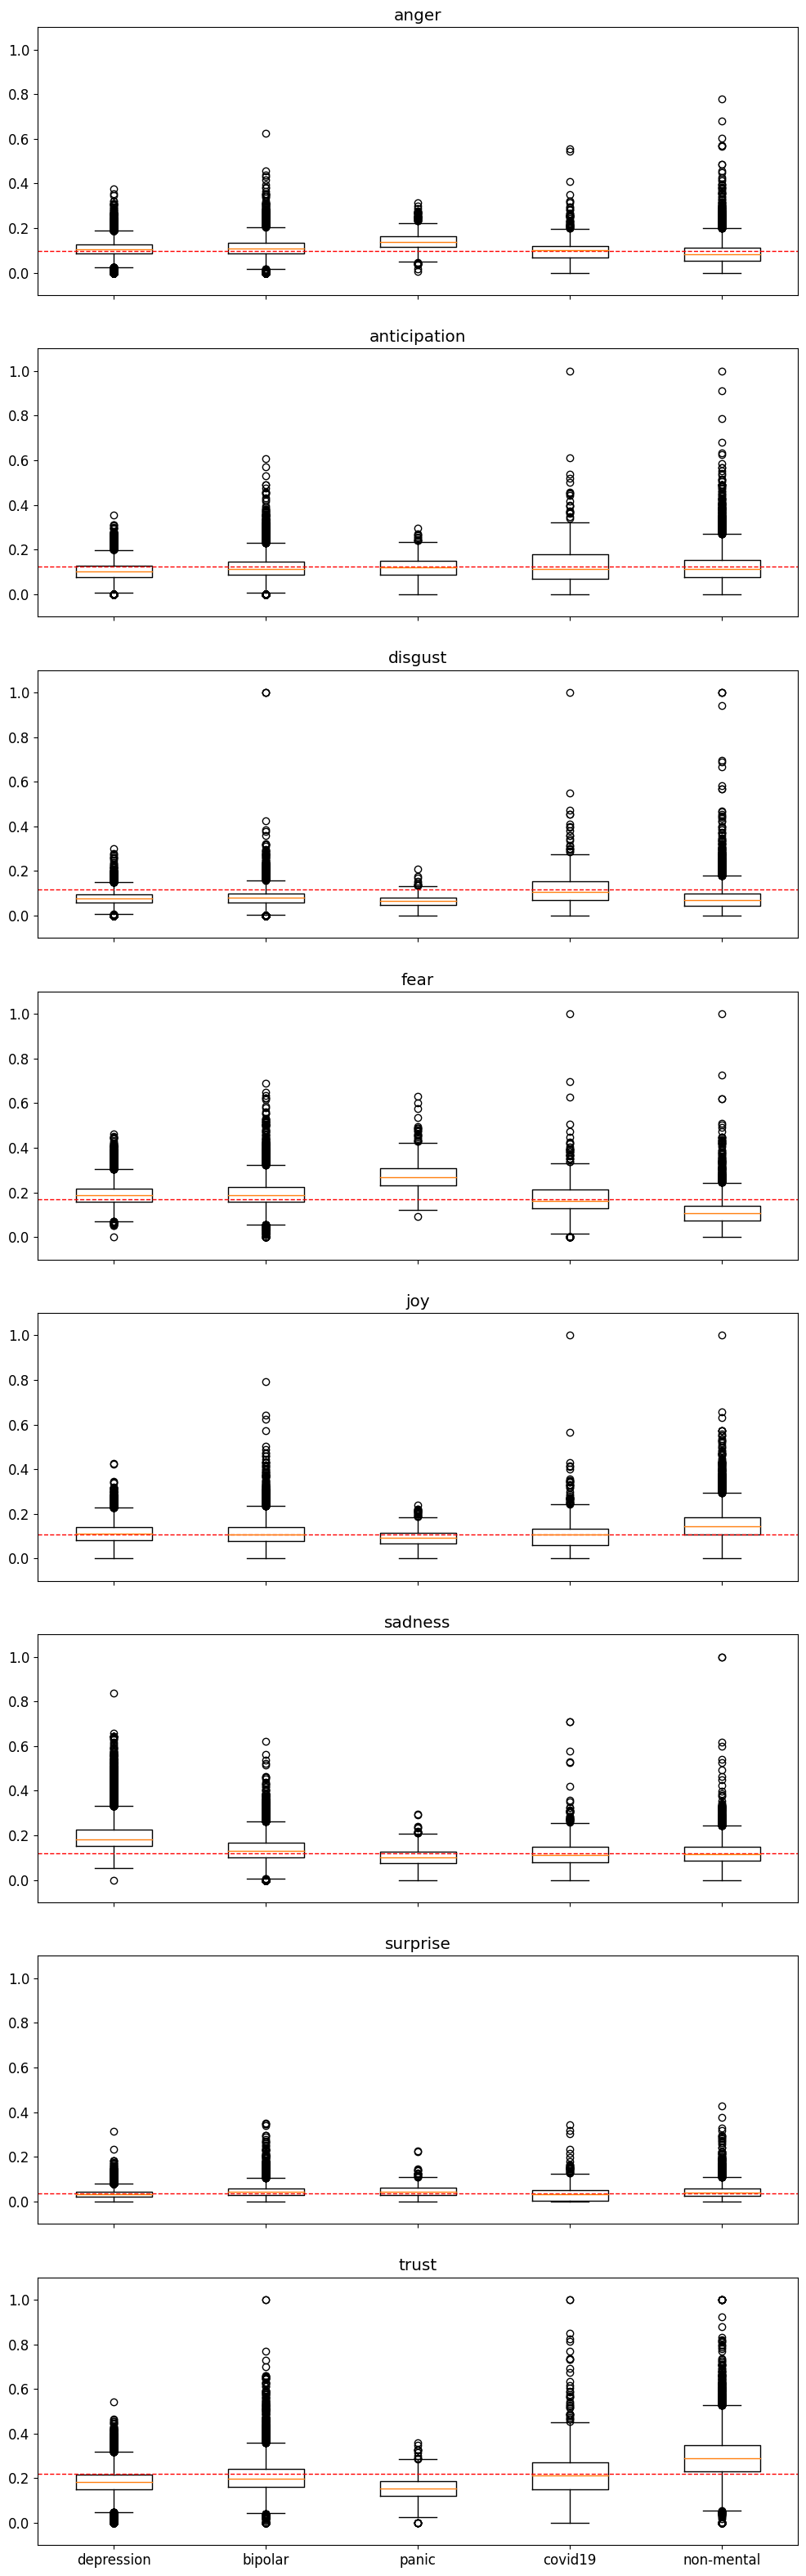

In [ ]:
cat_box_by_all_red(depression_catRScore,bipolar_catRScore,panic_catRScore,covid_catRScore,teaching_catRScore)

# VA Scoring Neg/Pos Independently

In [30]:
depression_upgrade = pd.read_csv("./scoring_result/negpos_independet/depression_score.csv")
print("depression_upgrade: ", len(depression_upgrade))

bipolar_upgrade = pd.read_csv("./scoring_result/negpos_independet/bipolar_score.csv")
print("bipolar_upgrade: ", len(bipolar_upgrade))

panic_upgrade = pd.read_csv("./scoring_result/negpos_independet/panic_score.csv")
print("panic_upgrade: ", len(panic_upgrade))

depression_upgrade:  31226
bipolar_upgrade:  12737
panic_upgrade:  760


In [31]:
covid_upgrade = pd.read_csv("./scoring_result/negpos_independet/covid_score.csv")
print("covid_upgrade: ", len(covid_upgrade))

# relationship_upgrade = pd.read_csv("./scoring_result/upgraded_twice/relationship_score.csv")
# print("relationship_upgrade: ", len(relationship_upgrade))

teaching_upgrade = pd.read_csv("./scoring_result/negpos_independet/teaching_score.csv")
print("teaching_upgrade: ", len(teaching_upgrade))

covid_upgrade:  868
teaching_upgrade:  10026


In [32]:
depression_ratio_NV = depression_upgrade['NVscore'] / depression_upgrade['numTokens']
depression_ratio_PV = depression_upgrade['PVscore'] / depression_upgrade['numTokens']
depression_ratio_NA = depression_upgrade['NAscore'] / depression_upgrade['numTokens']
depression_ratio_PA = depression_upgrade['PAscore'] / depression_upgrade['numTokens']

bipolar_ratio_NV = bipolar_upgrade['NVscore'] / bipolar_upgrade['numTokens']
bipolar_ratio_PV = bipolar_upgrade['PVscore'] / bipolar_upgrade['numTokens']
bipolar_ratio_NA = bipolar_upgrade['NAscore'] / bipolar_upgrade['numTokens']
bipolar_ratio_PA = bipolar_upgrade['PAscore'] / bipolar_upgrade['numTokens']

panic_ratio_NV = panic_upgrade['NVscore'] / panic_upgrade['numTokens']
panic_ratio_PV = panic_upgrade['PVscore'] / panic_upgrade['numTokens']
panic_ratio_NA = panic_upgrade['NAscore'] / panic_upgrade['numTokens']
panic_ratio_PA = panic_upgrade['PAscore'] / panic_upgrade['numTokens']

covid_ratio_NV = covid_upgrade['NVscore'] / covid_upgrade['numTokens']
covid_ratio_PV = covid_upgrade['PVscore'] / covid_upgrade['numTokens']
covid_ratio_NA = covid_upgrade['NAscore'] / covid_upgrade['numTokens']
covid_ratio_PA = covid_upgrade['PAscore'] / covid_upgrade['numTokens']

teaching_ratio_NV = teaching_upgrade['NVscore'] / teaching_upgrade['numTokens']
teaching_ratio_PV = teaching_upgrade['PVscore'] / teaching_upgrade['numTokens']
teaching_ratio_NA = teaching_upgrade['NAscore'] / teaching_upgrade['numTokens']
teaching_ratio_PA = teaching_upgrade['PAscore'] / teaching_upgrade['numTokens']


In [33]:
depression_upgrade['NVscore'] = depression_upgrade['NVscore'] / depression_upgrade['NVnum']
depression_upgrade['PVscore'] = depression_upgrade['PVscore'] / depression_upgrade['PVnum']
depression_upgrade['NAscore'] = depression_upgrade['NAscore'] / depression_upgrade['NAnum']
depression_upgrade['PAscore'] = depression_upgrade['PAscore'] / depression_upgrade['PAnum']

bipolar_upgrade['NVscore'] = bipolar_upgrade['NVscore'] / bipolar_upgrade['NVnum']
bipolar_upgrade['PVscore'] = bipolar_upgrade['PVscore'] / bipolar_upgrade['PVnum']
bipolar_upgrade['NAscore'] = bipolar_upgrade['NAscore'] / bipolar_upgrade['NAnum']
bipolar_upgrade['PAscore'] = bipolar_upgrade['PAscore'] / bipolar_upgrade['PAnum']

panic_upgrade['NVscore'] = panic_upgrade['NVscore'] / panic_upgrade['NVnum']
panic_upgrade['PVscore'] = panic_upgrade['PVscore'] / panic_upgrade['PVnum']
panic_upgrade['NAscore'] = panic_upgrade['NAscore'] / panic_upgrade['NAnum']
panic_upgrade['PAscore'] = panic_upgrade['PAscore'] / panic_upgrade['PAnum']

covid_upgrade['NVscore'] = covid_upgrade['NVscore'] / covid_upgrade['NVnum']
covid_upgrade['PVscore'] = covid_upgrade['PVscore'] / covid_upgrade['PVnum']
covid_upgrade['NAscore'] = covid_upgrade['NAscore'] / covid_upgrade['NAnum']
covid_upgrade['PAscore'] = covid_upgrade['PAscore'] / covid_upgrade['PAnum']

teaching_upgrade['NVscore'] = teaching_upgrade['NVscore'] / teaching_upgrade['NVnum']
teaching_upgrade['PVscore'] = teaching_upgrade['PVscore'] / teaching_upgrade['PVnum']
teaching_upgrade['NAscore'] = teaching_upgrade['NAscore'] / teaching_upgrade['NAnum']
teaching_upgrade['PAscore'] = teaching_upgrade['PAscore'] / teaching_upgrade['PAnum']


In [34]:
depression_upgrade.fillna(0,inplace=True)
bipolar_upgrade.fillna(0,inplace=True)
panic_upgrade.fillna(0,inplace=True)
covid_upgrade.fillna(0,inplace=True)
teaching_upgrade.fillna(0,inplace=True)

## Positive

In [35]:

def normalize_df(df):
    for i in range(len(df)):
        if df['NVscore'][i] < -1:
            df['NVscore'][i] = -1
        if df['PVscore'][i] > 1:
            df['PVscore'][i] = 1
        if df['NAscore'][i] < -1:
            df['NAscore'][i] = -1
        if df['PAscore'][i] > 1:
            df['PAscore'][i] = 1
    

normalize_df(covid_upgrade)
# normalize_df(relationship_upgrade)
normalize_df(teaching_upgrade)

normalize_df(depression_upgrade)
normalize_df(bipolar_upgrade)
normalize_df(panic_upgrade)

In [36]:
def normalize_lst(NV,PV,NA,PA):
    for i in range(len(NV)):
        if NV[i] < -1:
            NV[i] = -1
        if PV[i] > 1:
            PV[i] = 1
        if NA[i] < -1:
            NA[i] = -1
        if PA[i] > 1:
            PA[i] = 1

normalize_lst(covid_ratio_NV, covid_ratio_PV,covid_ratio_NA,covid_ratio_PA)
# normalize_lst(relationship_ratio_NV,relationship_ratio_PV, relationship_ratio_A,relationship_ratio_PA)
normalize_lst(teaching_ratio_NV, teaching_ratio_PV,teaching_ratio_NA,teaching_ratio_PA)


normalize_lst(depression_ratio_NV,depression_ratio_PV, depression_ratio_NA,depression_ratio_PA)
normalize_lst(bipolar_ratio_NV,bipolar_ratio_PV, bipolar_ratio_NA,bipolar_ratio_PA)
normalize_lst(panic_ratio_NV,panic_ratio_PV,panic_ratio_NA, panic_ratio_PA)

## Plot

### NV

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


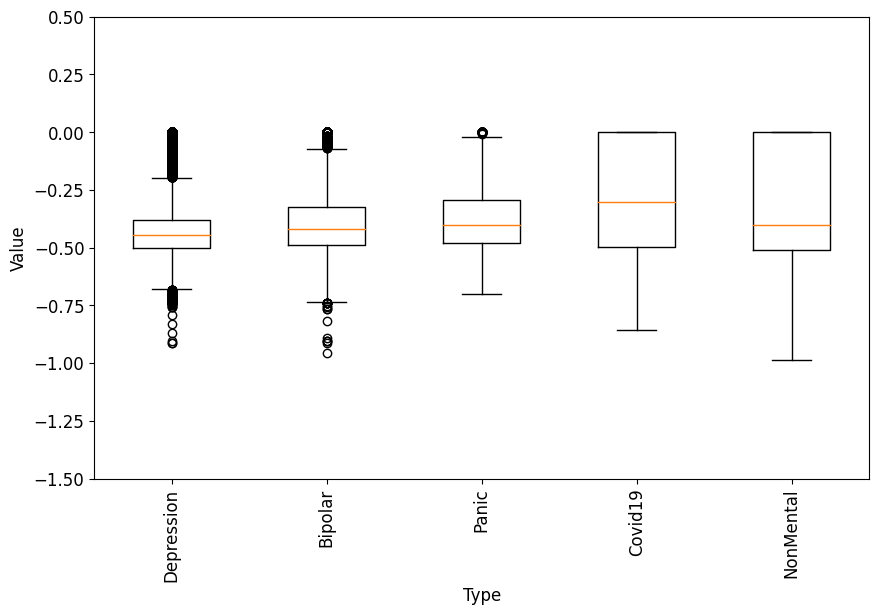

In [44]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_upgrade['NVscore']
data_b = bipolar_upgrade['NVscore']
data_c = panic_upgrade['NVscore']
data_d = covid_upgrade['NVscore']
# data_b = relationship_upgrade['NVscore']
data_e = teaching_upgrade['NVscore']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-1.5, .5)
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'],rotation= 90)
ax.set_xlabel('Type')
ax.set_ylabel('Value')


plt.show()

###PV

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


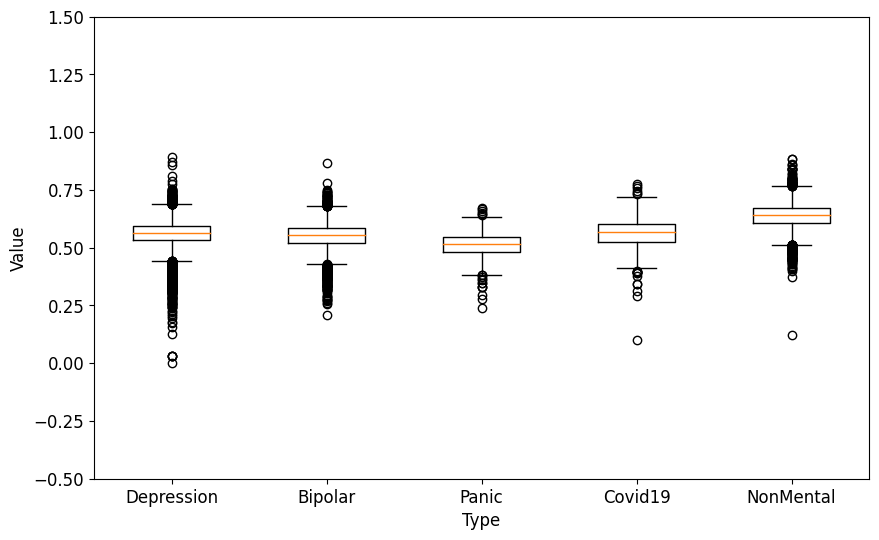

In [43]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_upgrade['PVscore']
data_b = bipolar_upgrade['PVscore']
data_c = panic_upgrade['PVscore']
data_d = covid_upgrade['PVscore']
# data_b = relationship_upgrade['NVscore']
data_e = teaching_upgrade['PVscore']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-.5, 1.5)
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'])
ax.set_xlabel('Type')
ax.set_ylabel('Value')


plt.show()

### NA

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


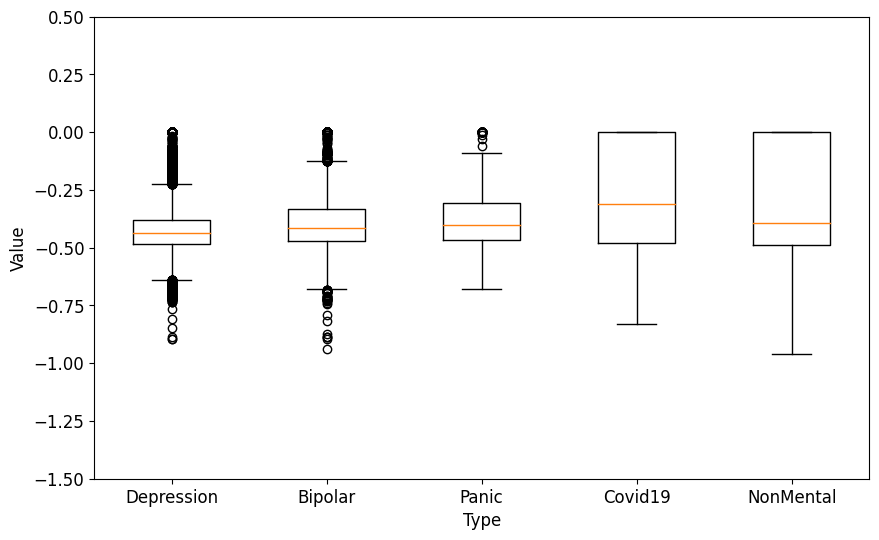

In [46]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_upgrade['NAscore']
data_b = bipolar_upgrade['NAscore']
data_c = panic_upgrade['NAscore']
data_d = covid_upgrade['NAscore']
# data_b = relationship_upgrade['NAscore']
data_e = teaching_upgrade['NAscore']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-1.5, .5)
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'])
ax.set_xlabel('Type')
ax.set_ylabel('Value')


plt.show()

### PA


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


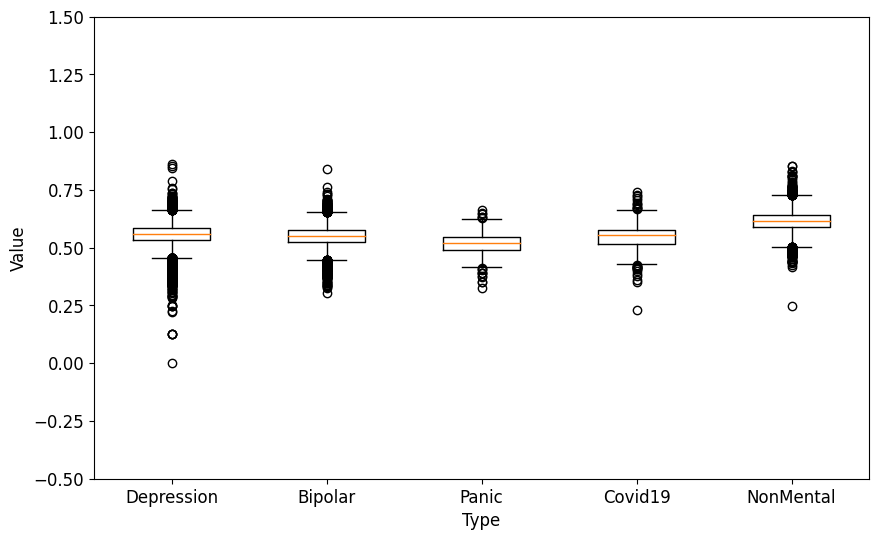

In [51]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
data_a = depression_upgrade['PAscore']
data_b = bipolar_upgrade['PAscore']
data_c = panic_upgrade['PAscore']
data_d = covid_upgrade['PAscore']
# data_b = relationship_upgrade['PAscore']
data_e = teaching_upgrade['PAscore']

# 3. 그래프 그리기
fig, ax = plt.subplots()

violin = ax.boxplot([data_a, data_b,data_c,data_d,data_e])#,showmedians=True)
ax.set_ylim(-.5, 1.5)
ax.set_xticks(np.arange(1, 6))
ax.set_xticklabels(['Depression','Bipolar','Panic','Covid19','NonMental'])
ax.set_xlabel('Type')
ax.set_ylabel('Value')


plt.show()

histogram

In [71]:
def va_hist(df):
    fig, ax = plt.subplots(nrows=2,sharex=True, sharey=True)

    sns.kdeplot(df['PVscore'], ax=ax[0],label='Valence-Positive')
    sns.kdeplot(df['NVscore'], ax=ax[0],label='Valence-Negative')
    sns.kdeplot(df['PAscore'], ax=ax[1],label='Arousal-Positive')
    sns.kdeplot(df['NAscore'], ax=ax[1],label='Arousal-Negative')

    for i in range(2):
      ax[i].legend(bbox_to_anchor=(1.0, 1.0))
      ax[i].set_xlim([-1.,1.])

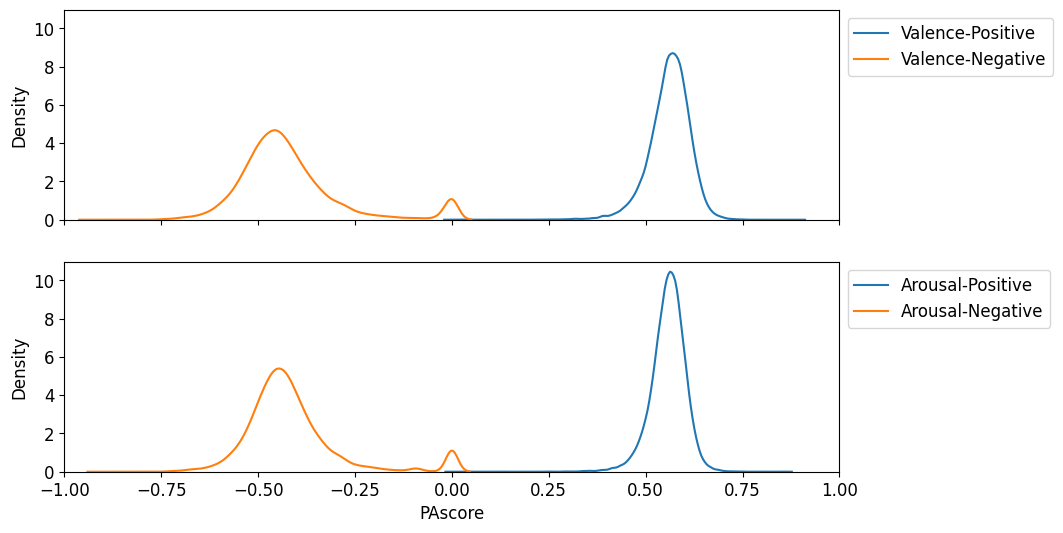

In [72]:
va_hist(depression_upgrade)

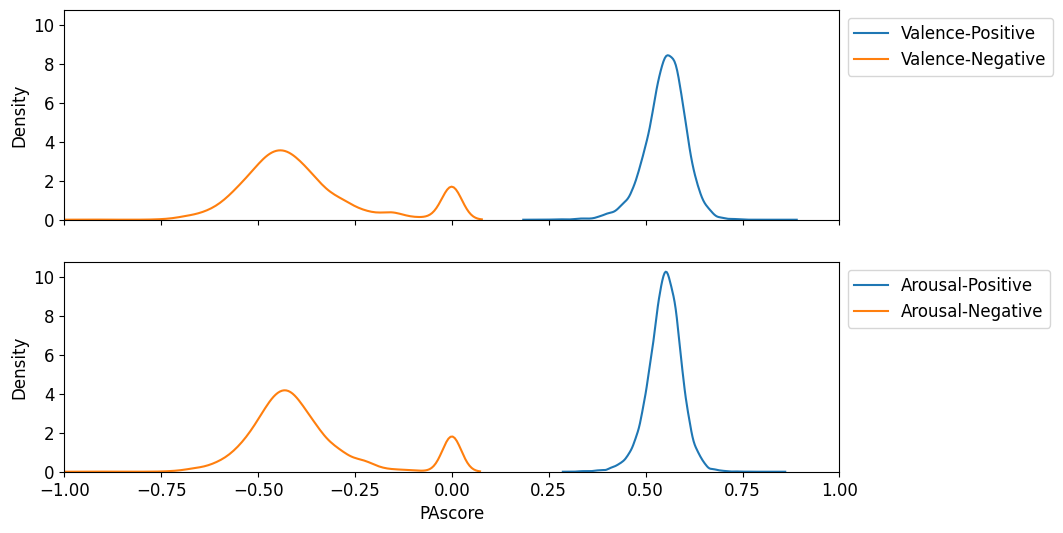

In [73]:
va_hist(bipolar_upgrade)

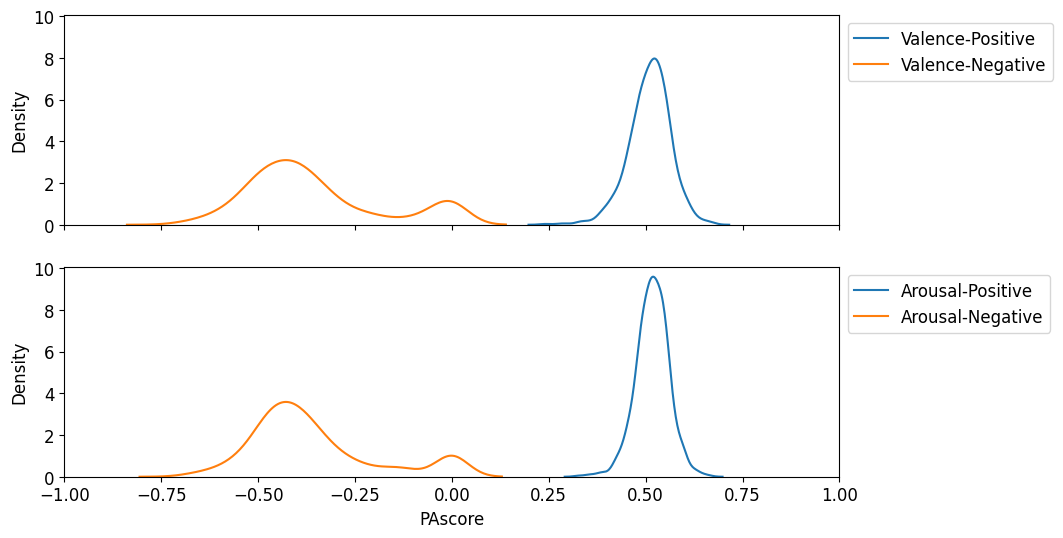

In [74]:
va_hist(panic_upgrade)

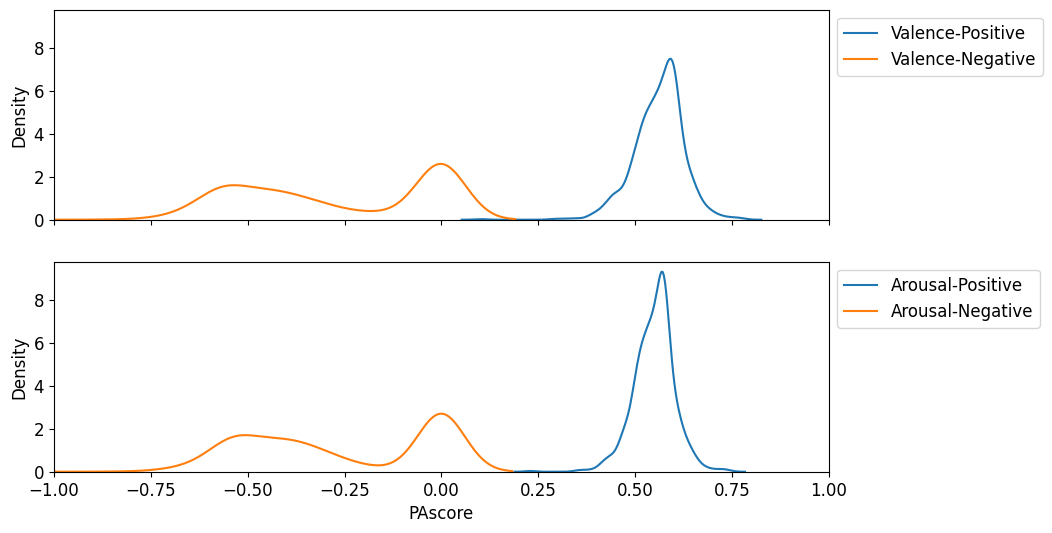

In [75]:
va_hist(covid_upgrade)

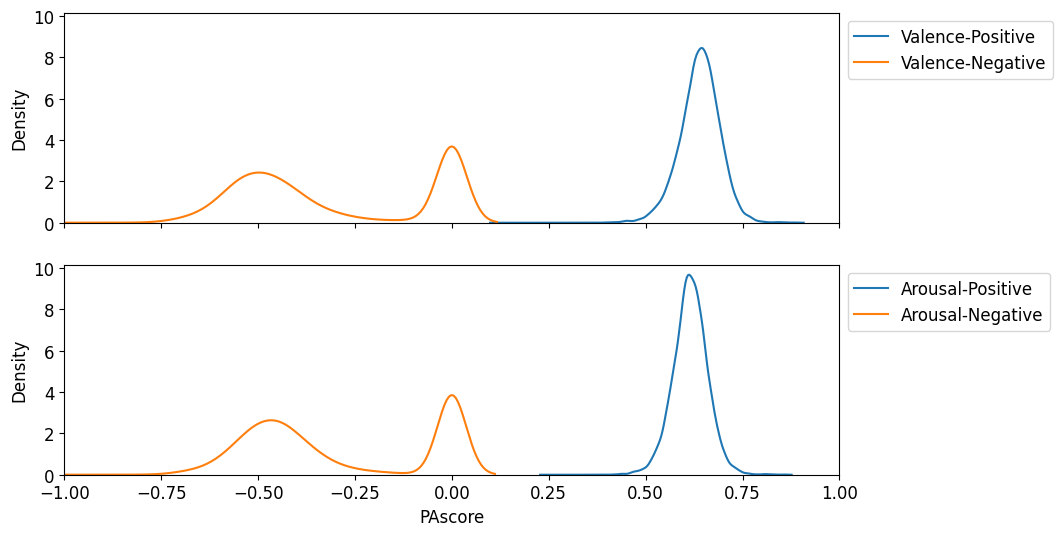

In [76]:
va_hist(teaching_upgrade)